Author: Sean Tulin
<br>
Date: Feb. 6, 2023
<br>
PHYS 2030 W23

# <font color=#46769B>Lesson 5: Multivariate sampling</font>

## <font color=#46769B>Motivation</font>

Probability distribution functions can depend on more than one variable at a time. So far we have focused on *univariate* PDFs, where each PDF $P(x)$ depends only on one variable $x$.
We have seen problems involving more than one variable, say $x$ and $y$, but we were always able to sample each one *independently* from their own PDFs, e.g., $P_x(x)$ and $P_y(y)$.
This situation is fine when two quantities are uncorrelated with each other, that is, the value of $x$ and $y$ are independent.

In Exercise 6, for example, we randomly sampled the height $h$ that a cosmic ray collision occurred and the angle $\theta$ of the cosmic ray's trajectory. 
Both quantities taken to be independent. The PDF for $h$ did not dependent on the sample measured for $\theta$, nor did the PDF for $\theta$ depend on the sample measured for $h$. 

However, one could argue that this was too simplistic. 
When $\theta$ is large, the cosmic ray passes through more of the atmosphere to reach a certain height $h$ compared to when $\theta$ is small (more straight down).
Thus, it would be natural to expect that large-$\theta$ collisions will occur higher in the atmostphere compared to small-$\theta$ collisions.
Larger values of $h$ are correlated with larger values of $\theta$, while smaller values of $h$ are correlated with smaller values of $\theta$.

The correct way to handle this issue is take a *multivariate* PDF that depends on both quantities. Here we generalize our discussion to this case.

## <font color=#46769B>Basics of multivariate probability distributions</font>

Suppose we have a PDF $P(x,y)$ that depends on two variables $x,y$. 
The quantity

$$P(x,y) \, dx \, dy$$

represents the probability of finding $x$ in the range $[x,x+dx]$ *and* $y$ in the range $[y,y+dy]$. The total probability of finding any value of $x$ and $y$ is $100\%$, that is

$$\int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \, P(x,y) = 1 \, .$$

The (true) mean values of $x$ and $y$ are

$$\bar{x} = \mu_x = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \, x\, P(x,y) \, ,$$

$$\bar{y} = \mu_y = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \, y\, P(x,y) \, .$$

More generally, the mean of any function $f(x,y)$ is

$$\overline{f(x,y)} = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \, f(x,y) \, P(x,y) \, ,$$

The (true) variances of $x$ and $y$ are

$$\sigma_x^2 = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \, (x - \mu_x)^2\, P(x,y)  = \overline{x^2} - \bar{x}^2 \, , $$

$$\sigma_y^2  = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \, (y - \mu_y)^2\, P(x,y)  = \overline{y^2} - \bar{y}^2  \, .$$

The standard deviations are $\sigma_x = \sqrt{\sigma_x^2}$ and $\sigma_y = \sqrt{\sigma_y^2}$.

Suppose we *are* able to sample from $P(x,y)$, generating samples

$$(x_0, \, x_1, \, ... , \, x_{N-1}) \, , \qquad (y_0, \, y_1, \, ... , \, y_{N-1}) \, .$$ 

The mean values of $x$ and $y$ are simply

$$\langle x \rangle = \frac{1}{N} \sum_{i=0}^{N-1} x_i \, ,$$

$$\langle y \rangle = \frac{1}{N} \sum_{i=0}^{N-1} y_i \, .$$

In general, we can calculate the mean value of *any* function $f(x,y)$ as

$$\langle f(x,y) \rangle = \frac{1}{N} \sum_{i=0}^{N-1} f(x_i,y_i) \, . \qquad {\rm (1)}$$

## <font color=#46769B>Sampling</font>

If $x$ and $y$ are *uncorrelated* with each other (*independent* from each other), then we can factorize $P(x,y)$ by writing it as a product of two functions

$$ P(x,y) = P_x(x) P_y(y)$$

where $P_x(x)$ and $P_y(y)$ only depend on one variable separately. In this case, we just sample $x$ from $P_x(x)$ and likewise $y$ from $P_y(y)$.

However, it may be the case that $x$ and $y$ are correlated with each other. For example, suppose larger values of $x$ are more probable when $y$ is large, and vice-versa. In some cases, we can *still* factorize a multivariate PDF into a product of univariate PDFs if we perform a change of variables. But in the general case, it is not possible.

Importance sampling is useful in the general case because we are free to choose the proposal distribution $Q(x,y)$. In particular, we can choose a *factorizable* PDF that can be written

$$ Q(x,y) = Q_x(x) Q_y(y)$$

that we know how to sample from. We draw $x$ from $Q_x(x)$ and $y$ from $Q_y(y)$. Then we calculate the weights

$$w_i = \frac{P(x_i,y_i)}{Q(x_i,y_i)} = \frac{P(x_i,y_i)}{Q_x(x_i)Q_y(y_i)} \, .$$

Then we can calculate any mean value we like

$$\langle f(x,y) \rangle = \frac{1}{N} \sum_{i=0}^{N-1} w_i f(x_i,y_i)$$

as in Eq. (1) but with the appropriate weights.

It is straightforward to generalize our discussion to an arbitrary number of variables, say, $x$, $y$, $z$, etc. 

We should pause to notice a __wonderful thing__ about Monte Carlo sampling. Suppose we have $d$ variables in our PDF, e.g., $P(x,y,z,...)$. To compute an expectation value of a function $f(x,y,z,...)$

$$\overline{f(x,y,z,...)} = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \int_{-\infty}^{\infty} dz ... f(x,y,z,...) \, P(x,y,z,...) $$

we need to perform a $d$-dimensional integral. If it takes $N$ operations to perform a one-dimensional integral, naively it will take $N^d$ operations to perform a $d$-dimentional integral. This is the __curse of dimensionality__.

On the other hand, to estimate the same quantity using Monte Carlo sampling (say, via importance sampling) we need only draw $N$ samples for each of the $d$ variables, compute each of the $N$ weights, and perform a sum over $N$ terms

$$\langle f(x,y,z,...) \rangle = \frac{1}{N} \sum_{i=0}^{N-1} w_i f(x_i,y_i,z_i,...) \, .$$

In the end, the number of operations is $N$ times some modest factor, which is far, *far* smaller than $N^d$ if $d$ is more than a few.

## <font color=#46769B>Histograms</font>

There is built-in function `matplotlib.pyplot.hist2d` that we will use to show 2D histograms. The syntax is
```py
import matplotlib.pyplot as plt
plt.hist2D(x,y,weights=w)
```
where the keyword `weights` sets the weights for your samples.

Here is a basic example to `hist2d` without weights. We sample $x$ and $y$ each from their own normal distributions (assuming they are independent). Feel free to adjust the means $\mu_x, \mu_y$, standard deviations $\sigma_x,\sigma_y$, and numbers of `bins` in the $x$ and $y$ directions.

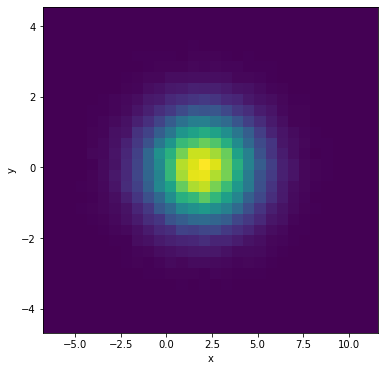

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num = 10**5

mu_x, sigma_x = 2, 2
x = np.random.normal(mu_x,sigma_x,num)

mu_y, sigma_y = 0, 1
y = np.random.normal(mu_y,sigma_y,num)

# Adjust the figsize to make a square plot (equal axis ratios)
plt.figure(figsize=(6,6))

# Make a histogram
# bins=[num_xbins,num_ybins]
plt.hist2d(x,y,bins=[30,30])

plt.xlabel('x')
plt.ylabel('y')

plt.show()

### <font color=#46769B>Example: Importance sampling a multivariate distribution</font>

Consider the following multivariate PDF:

$$P(x,y) = \frac{\sqrt{7}}{8\pi} \exp\left( - \frac{1}{2}\left( x^2 + \frac{3}{2} x y + y^2 \right) \right)\, .$$

The peculiar factor in front is fixed by required that $\int dx \int dy \, P(x,y) = 1$.
The goal is to compute the mean values of $x$ and $y$, their standard deviations, and make a 2D histogram corresponding to $P(x,y)$.

We can express this PDF as a product of three terms

$$P(x,y) = \frac{1}{\sqrt{2 \pi}} e^{- \tfrac{x^2}{2} } \times \frac{1}{\sqrt{2 \pi}} e^{- \tfrac{y^2}{2} }
\times \frac{\sqrt{7}}{4} e^{- \tfrac{3}{4} x y} \,. $$

If we only had the first and second terms, we could factorize $P(x,y) = P_x(x) P_y(y)$ where $P_x$ and $P_y$ are both given by the same normal distribution $\mathcal{N}(0,1)$.
But since the third term depends on *both* $x$ and $y$, we cannot factorize $P(x,y)$ after all.

Let's use importance sampling. We must guess *two* proposal distributions, $Q_x(x)$ and $Q_y(y)$. Motivated by the above discussion, let's choose normal distributions $\mathcal{N}(0,\sigma)$ for both. 
We will center $Q_x$ and $Q_y$ at zero, but we will keep the width $\sigma$ as a free parameter in our sampling.

Here is an outline of the code to follow:
- Load functions for calculating weighted means and standard deviations
- Defines PDFs: $P$, $Q_x$, $Q_y$
- Calculates weights $w_i = \frac{P(x_i,y_i)}{Q_x(x_i)Q_y(y_i)}$
- Computes means and standard deviations of $x$ and $y$
- Checks that $\frac{1}{N}\sum_{i=0}^{N-1} w_i \approx 1$
- Plots 2D histograms of $Q(x,y)$ and $P(x,y)$.

Try changing $\sigma$ for the proposal distributions and see what happens. (Even a good proposal distribution can turn bad!)


No weights:
Mean and standard deviation of x are -0.001596547146650098 and 1.9973306930419628
Mean and standard deviation of y are 0.0006211099599680756 and 2.0000423537447274


With weights:
Mean and standard deviation of x are 0.0018558220571589755 and 1.5128938788613173
Mean and standard deviation of y are -0.0023162172875835457 and 1.51296296570584


Mean value of the weights should be close to 1: 1.001903623061954


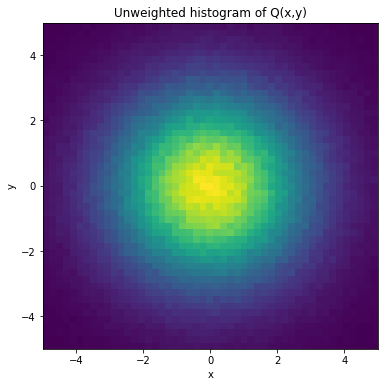

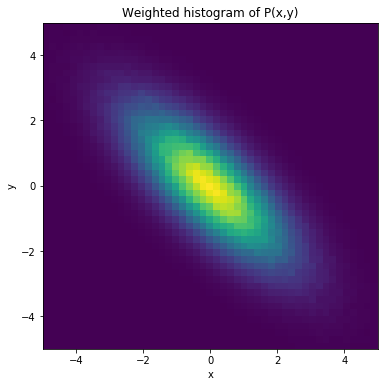

In [3]:
# Functions for calculating weighted mean and standard deviation
def mean(x,weights=None):
    
    if weights is not None:
        return np.mean(weights*x)
    else:
        return np.mean(x)
    
def std(x,weights=None):
    
    if weights is not None:
        return np.sqrt( np.mean(weights*x**2) - np.mean(weights*x)**2 )
    else:
        return np.std(x)

# Define PDFs
sigma = 2

# P(x,y)
def P(x,y):
    return np.sqrt(7)/(8*np.pi) * np.exp(-0.5*(x**2 + 1.5*x*y + y**2))

# Q_x(x)
def Q_x(x):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*x**2/sigma**2)

# Q_y(x)
def Q_y(x):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*x**2/sigma**2)

# Sample from Q_x and Q_y
num = 10**6
x_samples = np.random.normal(0,sigma,num)
y_samples = np.random.normal(0,sigma,num)

# Calculate weights
w = P(x_samples,y_samples)/(Q_x(x_samples)*Q_y(y_samples))

# Compute mean with no weights
print('No weights:')
print('Mean and standard deviation of x are', mean(x_samples), 'and', std(x_samples) )
print('Mean and standard deviation of y are', mean(y_samples), 'and', std(y_samples) )

print('\n') # line break

# Compute mean with weights
print('With weights:')
print('Mean and standard deviation of x are', mean(x_samples,weights=w), 'and', std(x_samples,weights=w) )
print('Mean and standard deviation of y are', mean(y_samples,weights=w), 'and', std(y_samples,weights=w) )

print('\n') # line break

# Check that the weights are normalized to 1
print('Mean value of the weights should be close to 1:', np.mean(w))

# Make histograms
# Specify bins explicitly [xbins,ybins]
bins = [np.linspace(-5,5), np.linspace(-5,5)]


# Unweighted histogram
plt.figure(figsize=(6,6))
plt.hist2d(x_samples,y_samples,bins=bins)
plt.title('Unweighted histogram of Q(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Weighted histogram
plt.figure(figsize=(6,6))
plt.hist2d(x_samples,y_samples,bins=bins,weights=w)
plt.title('Weighted histogram of P(x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## <font color=#46769B>Correlation and covariance</font>

The above example illustrates the principle of correlation. If $x$ is positive, $y$ is likely negative. If $y$ is positive, $x$ is likely negative. Since one variable often has the opposite sign to the other, it is likely that the product $x y$ should be negative. We can check this by making a histogram of the product $x y$.

This histogram shows the probability density for having $x y$ equal to a certain value. Where the histogram is largest, it is more likely that $xy$ takes those values.


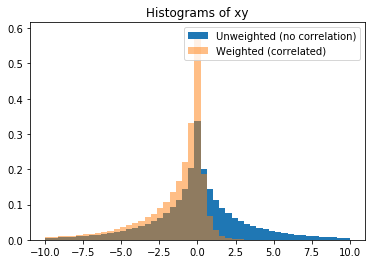

In [5]:
# Specify bins explicity
bins = np.linspace(-10,10)

# Make unweighted and weighted histograms showing sampled values of xy
plt.hist(x_samples*y_samples,bins=bins,alpha=1,label='Unweighted (no correlation)',density=True)
plt.hist(x_samples*y_samples,bins=bins,weights=w,alpha=0.5,label='Weighted (correlated)',density=True)

plt.title("Histograms of xy")
plt.legend()
plt.show()

Correlations between samples of different variables can be studied more systematically through a quantity known as the [__covariance matrix__](https://en.wikipedia.org/wiki/Covariance). The covariance matrix is a generalization of the usual variance.

For the case of two variables $x$ and $y$, the covariance matrix is
$$ \mathcal{C} = \left( \begin{array}{cc} \Delta x^2 & \Delta xy \\ \Delta xy & \Delta y^2 \end{array} \right) \, ,$$
where $\Delta x^2$ and $\Delta y^2$ are the usual variance of $x$ and $y$, and
$$\Delta xy = \frac{1}{N} \sum_{i} \left(x_i - \langle x \rangle\right)\left(y_i - \langle y \rangle\right)$$
quantifies the covariance. If $x$ and $y$ are *uncorrelated*, then $\Delta xy =0$.
For importance sampling, we have the same formulas including the weights $w_i$:
$$\Delta xy = \frac{1}{N}  \sum_{i} w_i \left(x_i - \langle x \rangle\right)\left(y_i - \langle y \rangle\right)$$


In a general, with $d$ variables to be sampled, the covariance matrix is a $d \times d$ matrix. 

Understanding the covariance between variables can often dramatically improve one's sampling algorithms. For example, in the 2D histogram for $P(x,y)$, it would make sense to sample with a narrow width along the $x=y$-diagonal, while sampling with a larger width along the $x=-y$ diagonal. This information is encoded by taking the eigenvalues and eigenvectors of the covariance matrix.

In [9]:
# Calculate the 2x2 covariance of our previous samples

def cov_matrix(x,y,weights=None):
    
    if weights is not None:
        x_mean = np.mean(weights*x)
        y_mean = np.mean(weights*y)
            
        # Calculate each entry as a function
        C_xx = np.mean(weights*(x-x_mean)**2)
        C_yy = np.mean(weights*(y-y_mean)**2)
        C_xy = np.mean(weights*(x-x_mean)*(y-y_mean))
        
        return np.array([[C_xx,C_xy],[C_xy,C_yy]])
    
    else:
        # Use built-in numpy function
        return np.cov([x,y])
    
print('Covariance matrix for unweighted samples (note C_xy is small)')
print(cov_matrix(x_samples,y_samples))

print('\n') # line break

print('Covariance for weighted samples (note C_xy is large)')
print(cov_matrix(x_samples,y_samples,weights=w))

Covariance matrix for unweighted samples (note C_xy is small)
[[ 3.98933389 -0.00536206]
 [-0.00536206  4.00017342]]


Covariance for weighted samples (note C_xy is large)
[[ 2.2888479  -1.71750255]
 [-1.71750255  2.28905695]]


## <font color=#46769B>Marginalized distributions</font>

In physical contexts, not all variables are created equal. Some variables, though you need to sample them in your analysis, might be uninteresting or unobservable. These are known as __nuisance parameters__.

For example, in Exercise 6: Cosmic Ray Muons, the muon's angle $\theta$ is a quantity that observers are interested to measure in their cosmic ray detectors. However, the height $h$ at which the muon was produced in the cosmic ray collision is a nuisance parameter since it is not directly measurable.

Suppose we have a multivariate PDF $P(x,y)$ for two variables, $x$ and $y$. Suppose $y$ is a nuisance parameter and we are only interested in $x$. The __marginalized PDF__ is the PDF for the interesting variable $x$, namely

$$P_x(x) = \int dy \, P(x,y)$$

where the nuisance parameter $y$ has been averaged over. This step of integrating over $y$ is known as __marginalizing__.

If $x$ and $y$ are uncorrelated, we can write $P(x,y) = P_x(x) P_y(y)$. Then the marginalized PDF for $x$ is simply

$$P_x(x) = \int dy \, P(x,y) = \int dy \, P_x(x) \, P_y(y) =  P_x(x) \int dy \, \, P_y(y) = P_x(x) \, ,$$

namely just the univariate PDF for $x$. 

Let's compute the marginalized PDF $P_x(x)$ for the same PDF as before:

$$P(x,y) = \frac{\sqrt{7}}{8\pi} \exp\left( - \frac{1}{2}\left( x^2 + \frac{3}{2} x y + y^2 \right) \right)\, .$$

We can compute $P_x(x)$ analytically (through a complicated Gaussian integral, we'll skip the details):

$$P_x(x) = \int dy \, P(x,y) = \sqrt{\frac{7}{32\pi}} e^{- \frac{7 x^2}{32}} \, .$$

The main thing we want to illustrate is how to compute a histogram for $P_x(x)$ from our samples. Actually, it is very simple: just do a 1D histogram!

So, always remember. If you have a multivariate PDF, and you are asked to find a histogram for the marginalized PDF for a single variable, just do the usual 1D histogram.


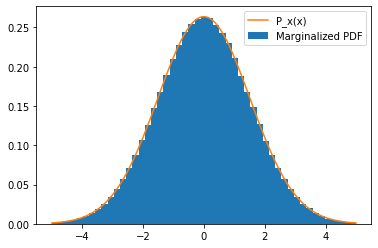

In [10]:
# Specify bins
bins = np.linspace(-5,5)

# Histogram for marginalized PDF
plt.hist(x_samples,bins=bins,weights=w,label='Marginalized PDF',density=True)

# Show it agrees with the analytic result
x = np.linspace(-5,5,num=100)
P_x = np.sqrt(7/(32*np.pi)) * np.exp(-7*x**2/32)
plt.plot(x,P_x,label='P_x(x)')

plt.legend()
plt.show()

## <font color=#46769B>Multivariate normal distributions</font>

We are familiar with a univariate normal distribution, say for a variable $x$:

$$\mathcal{N}(\mu,\sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{x^2}{2\sigma^2}} \, .$$

Suppose we have two variables, $x$ and $y$, each described by an independent normal distribution $\mathcal{N}(\mu_x,\sigma_x)$ and $\mathcal{N}(\mu_y,\sigma_y)$. The joint probability distribution is

$$ P(x,y) = \mathcal{N}_x(x) \mathcal{N}_y(y) = \frac{1}{2\pi \sigma_x \sigma_y} \, \exp\left(-\frac{(x-\mu_x)^2}{2\sigma_x^2} - \frac{(y-\mu_y)^2}{2\sigma_y^2} \right)  \, .$$

This expression is an example of a multivariate normal distribution. This is the factorizable case since $P(x,y)$ is a product of two *univariate* PDFs, by construction.

Now, there is a generalization that we will now consider. First, we put the variables $x,y$ in a vector $\vec{r}$, and similarly for their means $\mu_x,\mu_y$:

$$ \vec{r} = \left( \begin{array}{cc} x \\ y \end{array} \right) \, , \qquad
\vec{\mu} = \left( \begin{array}{cc} \mu_x \\ \mu_y \end{array} \right)$$

Next, we write the dependence on the $\sigma_x$ and $\sigma_y$ in terms of the covariance matrix introduced above. For the PDF above, there is no correlation, so 

$$C = \left( \begin{array}{cc} \sigma_x^2 & 0 \\ 0 & \sigma_y^2 \end{array} \right) \, .$$

Note the inverse of $C$ is simply

$$C^{-1} = \left( \begin{array}{cc} \sigma_x^{-2} & 0 \\ 0 & \sigma_y^{-2} \end{array} \right) \, .$$

Then, with this new notation, we can write our PDF as

$$ P(x,y) = 
\frac{1}{2\pi \sqrt{\det(C)}} \, \exp\left(-\frac{1}{2} (\vec{r} - \vec{\mu})^\intercal C^{-1} (\vec{r} - \vec{\mu})\right) \, . 
\qquad (2)$$

Here $^\intercal$ means transpose, so column vectors are transposed to row vectors. Although we derived Eq. (2) for the specific case of no correlation where $C$ was a diagonal matrix, it also holds for the case with nonzero correlation where $C$ has nondiagonal elements.

The general formula for a multivariate normal distribution is as follows: 

$$ P(x,y,z,...) = 
\frac{1}{\sqrt{(2\pi)^d \det(C)}} \, \exp\left(-\frac{1}{2} (\vec{r} - \vec{\mu})^\intercal C^{-1} (\vec{r} - \vec{\mu})\right) \, ,
\qquad (3)$$

where the variables and their means are organized in vector form as

$$ \vec{r} = \left( \begin{array}{cc} x \\ y \\ z \\ \vdots \end{array} \right) \, , \qquad
\vec{\mu} = \left( \begin{array}{cc} \mu_x \\ \mu_y \\ \mu_z \\ \vdots \end{array} \right) \, ,$$

and the covariance matrix $C$ is a $d \times d$ matrix.